### Objective

Preserve the waterbodies (Lake, Aquifier, Water Spring, River) for efficient water supply management. To achieve this,it is important to predict the most efficient water availability, in terms of level and water flow for each day of the year.

In [758]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from datetime import datetime as dt

In [759]:
#Dowloading the data for Lake Bilancino 
lb= pd.read_csv('Lake_Bilancino.csv')
lb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6603 entries, 0 to 6602
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  6603 non-null   object 
 1   Rainfall_S_Piero      6026 non-null   float64
 2   Rainfall_Mangona      6026 non-null   float64
 3   Rainfall_S_Agata      6026 non-null   float64
 4   Rainfall_Cavallina    6026 non-null   float64
 5   Rainfall_Le_Croci     6026 non-null   float64
 6   Temperature_Le_Croci  6025 non-null   float64
 7   Lake_Level            6603 non-null   float64
 8   Flow_Rate             6582 non-null   float64
dtypes: float64(8), object(1)
memory usage: 464.4+ KB


In [760]:
lb.describe()

,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
count,6026.000000,6026.000000,6026.000000,6026.000000,6026.000000,6025.000000,6603.000000,6582.000000
mean,2.471225,3.340657,2.670063,2.674743,3.129871,14.530141,249.564091,2.760968
std,6.650012,8.903134,7.166643,7.655847,8.025121,6.944029,2.172558,4.073428
min,0.000000,0.000000,0.000000,0.000000,0.000000,-5.350000,243.530000,0.310000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,248.000000,0.600000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,14.500000,250.200000,1.500000
75%,0.800000,1.400000,1.200000,0.600000,1.200000,20.100000,251.400000,3.000000
max,80.600000,110.000000,120.200000,113.600000,88.400000,34.000000,252.760000,74.650000


In [761]:
#Checking the columns
lb.columns

Index(['Date', 'Rainfall_S_Piero', 'Rainfall_Mangona', 'Rainfall_S_Agata',
       'Rainfall_Cavallina', 'Rainfall_Le_Croci', 'Temperature_Le_Croci',
       'Lake_Level', 'Flow_Rate'],
      dtype='object')

In [762]:
#Checking data of Lake Bilancino
lb.tail()

,Date,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
6598,26/06/2020,0.0,0.0,0.0,0.0,0.0,22.50,250.85,0.6
6599,27/06/2020,0.0,0.0,0.0,0.0,0.0,23.40,250.84,0.6
6600,28/06/2020,0.0,0.0,0.0,0.0,0.0,21.50,250.83,0.6
6601,29/06/2020,0.0,0.0,0.0,0.0,0.0,23.20,250.82,0.6
6602,30/06/2020,0.0,0.0,0.0,0.0,0.0,22.75,250.80,0.6


### Dataset features provided

The features provided are Rain fall, Temperature, Lake level, Flow Rate

Output expected Predicted Lake Level and Flow rate.

### Tentative Analysis approach

1) Plot unfiltered data to see trend->Check the Corelation->Use ML Models to predict flow & Level of lake -> fine tune the model to improve the accuracy.

2) Plot unfiltered data to see trend->Check the Corelation->Use features to build a mathematical model to predict flow & Level of lake -> fine tune the model to improve the accuracy

In [763]:
# Handling date data type
lb['Date']= pd.to_datetime(lb['Date'])
lb['Year']= lb['Date'].dt.year
lb['Month']=lb['Date'].dt.month
lb.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6603 entries, 0 to 6602
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  6603 non-null   datetime64[ns]
 1   Rainfall_S_Piero      6026 non-null   float64       
 2   Rainfall_Mangona      6026 non-null   float64       
 3   Rainfall_S_Agata      6026 non-null   float64       
 4   Rainfall_Cavallina    6026 non-null   float64       
 5   Rainfall_Le_Croci     6026 non-null   float64       
 6   Temperature_Le_Croci  6025 non-null   float64       
 7   Lake_Level            6603 non-null   float64       
 8   Flow_Rate             6582 non-null   float64       
 9   Year                  6603 non-null   int64         
 10  Month                 6603 non-null   int64         
dtypes: datetime64[ns](1), float64(8), int64(2)
memory usage: 567.6 KB


In [764]:
lb.head()

,Date,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate,Year,Month
0,2002-03-06,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31,2002,3
1,2002-04-06,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31,2002,4
2,2002-05-06,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31,2002,5
3,2002-06-06,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31,2002,6
4,2002-07-06,NaN,NaN,NaN,NaN,NaN,NaN,249.44,0.31,2002,7


##### Lake level data grouping by year and months

In [765]:
Lake_level= lb.groupby(["Year", "Month"]).Lake_Level.mean().reset_index()
Lake_level.head()

,Year,Month,Lake_Level
0,2002,1,249.158333
1,2002,2,249.143333
2,2002,3,249.172857
3,2002,4,249.148571
4,2002,5,249.130000


##### plotting the lake level over the TS to see the variation over year

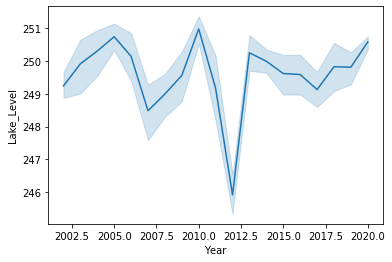

In [766]:
sns.lineplot(data=Lake_level, x="Year", y="Lake_Level")

Minimum Lake level according to the data was 244.52 in 2012 October

In [767]:
print(Lake_level[Lake_level.Lake_Level==Lake_level.Lake_Level.min()])

     Year  Month  Lake_Level
129  2012     10  244.520645


Maximum Lake level reached according to historic data was 251.58 in March 2010

In [768]:

print(Lake_level[Lake_level.Lake_Level==Lake_level.Lake_Level.max()])

    Year  Month  Lake_Level
98  2010      3  251.582258


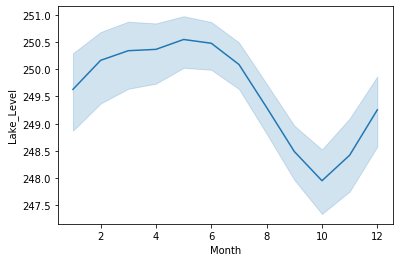

In [769]:
#plotting the lake level over the TS to see the variation over month
sns.lineplot(data=Lake_level, x="Month", y="Lake_Level")

#### Checking the flow rate over Months and Years

In [770]:
flow_rate= lb.groupby(["Year","Month"]).Flow_Rate.mean().reset_index()
flow_rate.head()

,Year,Month,Flow_Rate
0,2002,1,1.180000
1,2002,2,2.216667
2,2002,3,2.315714
3,2002,4,2.001429
4,2002,5,2.072857


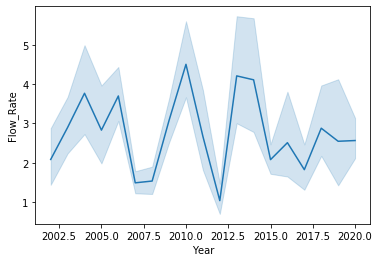

In [771]:
#Plotting the flow rate over the years (2002-2020)
sns.lineplot(data=flow_rate,x="Year",y= "Flow_Rate")

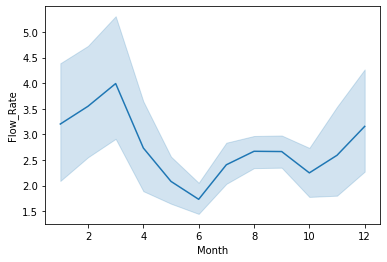

In [772]:
#Plotting the flow rate over the Months accross the years (2002-2020)
sns.lineplot(data=flow_rate,x="Month",y= "Flow_Rate")

#####  Finding the Month and year with extreme flow rate data

In [773]:
print(flow_rate[flow_rate.Flow_Rate==flow_rate.Flow_Rate.min()])

print(flow_rate[flow_rate.Flow_Rate==flow_rate.Flow_Rate.max()])


     Year  Month  Flow_Rate
124  2012      5   0.543548
     Year  Month  Flow_Rate
134  2013      3   11.73129


Flow rate was minimum during May-2012 and Maximum during March 2013

#### Rain fall and Temperature Variation over Month & year

In [774]:
# Rain ditribution over the year
rain_yearly= lb.groupby(["Year"])[['Rainfall_S_Piero', 'Rainfall_Mangona', 'Rainfall_S_Agata','Rainfall_Cavallina','Rainfall_Le_Croci']].mean().reset_index()
rain_yearly.head()

,Year,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci
0,2002,NaN,NaN,NaN,NaN,NaN
1,2003,NaN,NaN,NaN,NaN,NaN
2,2004,2.387432,3.387432,2.214208,2.915301,3.053005
3,2005,2.574795,3.069041,2.974247,2.690411,3.058082
4,2006,2.031233,3.007671,2.193425,1.775890,2.558904


##### Plotting the rain pattern over the years

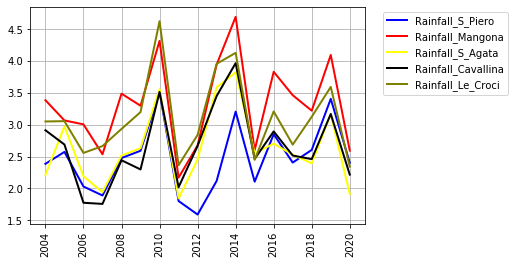

In [775]:
plt.plot( 'Year', 'Rainfall_S_Piero', data=rain_yearly, marker='', color='blue', linewidth=2)
plt.plot( 'Year', 'Rainfall_Mangona', data=rain_yearly, marker='', color='red', linewidth=2)
plt.plot( 'Year', 'Rainfall_S_Agata', data=rain_yearly, marker='', color='yellow', linewidth=2)
plt.plot( 'Year', 'Rainfall_Cavallina', data=rain_yearly, marker='', color='black', linewidth=2)
plt.plot( 'Year', 'Rainfall_Le_Croci', data=rain_yearly, marker='', color='olive', linewidth=2)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.xticks(rotation = 90)
plt.grid()

In [776]:
#Rain distribution over the Months
rain_monthly= lb.groupby(["Month"])[['Rainfall_S_Piero', 'Rainfall_Mangona', 'Rainfall_S_Agata','Rainfall_Cavallina','Rainfall_Le_Croci']].mean().reset_index()
rain_monthly.head()

,Month,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci
0,1,3.200384,4.638004,3.177351,3.612668,4.254127
1,2,2.679158,3.578526,2.832421,2.949474,3.670737
2,3,2.137428,2.924376,2.381190,2.514012,2.829175
3,4,2.705159,3.553968,2.823016,2.771429,3.422619
4,5,2.682917,3.623033,2.938196,2.812668,3.493282


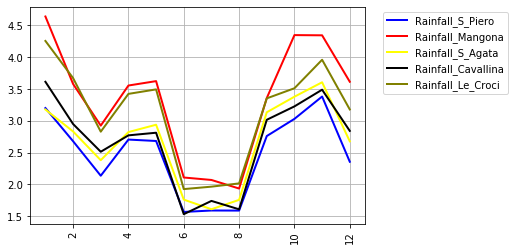

In [777]:
plt.plot( 'Month', 'Rainfall_S_Piero', data=rain_monthly, marker='', color='blue', linewidth=2)
plt.plot( 'Month', 'Rainfall_Mangona', data=rain_monthly, marker='', color='red', linewidth=2)
plt.plot( 'Month', 'Rainfall_S_Agata', data=rain_monthly, marker='', color='yellow', linewidth=2)
plt.plot( 'Month', 'Rainfall_Cavallina', data=rain_monthly, marker='', color='black', linewidth=2)
plt.plot( 'Month', 'Rainfall_Le_Croci', data=rain_monthly, marker='', color='olive', linewidth=2)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.xticks(rotation = 90)
plt.grid()

#### Observation about Rain data:

The above plot shows Mangona recieves the maximum rain and S_Piero recieves the minimum over the months in a year.
July to August period is the relatively dry period where there is consistent minimum rain.
September to February is the time when its raining to a decent level.

##### Analyzing Temperatrure data

In [778]:
temperature=lb.groupby(["Year","Month"]).Temperature_Le_Croci.mean().reset_index()
temperature.head()

,Year,Month,Temperature_Le_Croci
0,2002,1,NaN
1,2002,2,NaN
2,2002,3,NaN
3,2002,4,NaN
4,2002,5,NaN


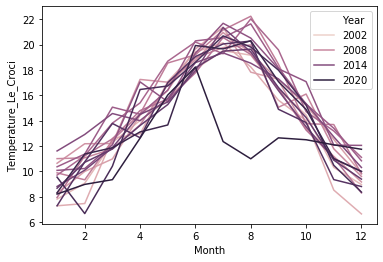

In [779]:
# Plotting the temperature pattern over the Year and Months
temperature["Year"]=temperature["Year"].astype(str)
sns.lineplot(data=temperature, x="Month", y="Temperature_Le_Croci", hue="Year")

#### Obseravtion about Temperature data:
Temperature gradually increases from January and reches to peak during June to August and gradually decreases to minimum in January.

In [780]:
#Counting the Null value in Rain fall columns
lb[['Rainfall_S_Piero','Rainfall_Mangona', 'Rainfall_S_Agata','Rainfall_Cavallina','Rainfall_Le_Croci']].isnull().sum()

Rainfall_S_Piero      577
Rainfall_Mangona      577
Rainfall_S_Agata      577
Rainfall_Cavallina    577
Rainfall_Le_Croci     577
dtype: int64

In [781]:
# Dropping the rows with missing Rainfall values from Le_Croci
lb1=lb.dropna(subset=["Rainfall_Le_Croci","Temperature_Le_Croci"])
lb1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6025 entries, 578 to 6602
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  6025 non-null   datetime64[ns]
 1   Rainfall_S_Piero      6025 non-null   float64       
 2   Rainfall_Mangona      6025 non-null   float64       
 3   Rainfall_S_Agata      6025 non-null   float64       
 4   Rainfall_Cavallina    6025 non-null   float64       
 5   Rainfall_Le_Croci     6025 non-null   float64       
 6   Temperature_Le_Croci  6025 non-null   float64       
 7   Lake_Level            6025 non-null   float64       
 8   Flow_Rate             6025 non-null   float64       
 9   Year                  6025 non-null   int64         
 10  Month                 6025 non-null   int64         
dtypes: datetime64[ns](1), float64(8), int64(2)
memory usage: 564.8 KB


#### Data Preparation for Model building:

In [782]:
lb1['Rainfall_mean']=lb1[['Rainfall_S_Piero','Rainfall_Mangona', 'Rainfall_S_Agata','Rainfall_Cavallina','Rainfall_Le_Croci']].mean(axis = 1)
#lb1['Rainfall_mean']=lb1.apply(lambda row:(row.Rainfall_S_Piero+ row.Rainfall_Mangona+row.Rainfall_S_Agata+row.Rainfall_Cavallina+row.Rainfall_Le_Croci)/5,axis=1)
lb1['Rainfall_median']=lb1[['Rainfall_S_Piero','Rainfall_Mangona', 'Rainfall_S_Agata','Rainfall_Cavallina','Rainfall_Le_Croci']].median(axis = 1)
lb1['Rainfall_min']=lb1[['Rainfall_S_Piero','Rainfall_Mangona', 'Rainfall_S_Agata','Rainfall_Cavallina','Rainfall_Le_Croci']].min(axis = 1)
lb1['Rainfall_max']=lb1[['Rainfall_S_Piero','Rainfall_Mangona', 'Rainfall_S_Agata','Rainfall_Cavallina','Rainfall_Le_Croci']].max(axis = 1)
lb1['Rainfall_net']=lb1[['Rainfall_S_Piero','Rainfall_Mangona', 'Rainfall_S_Agata','Rainfall_Cavallina','Rainfall_Le_Croci']].sum(axis = 1)
lb1.head()

/Users/farazrahman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/farazrahman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/farazrahman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value i

,Date,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate,Year,Month,Rainfall_mean,Rainfall_median,Rainfall_min,Rainfall_max,Rainfall_net
578,2004-02-01,0.0,0.0,0.0,0.0,0.0,6.50,251.21,0.5,2004,2,0.00,0.0,0.0,0.0,0.0
579,2004-03-01,0.0,0.0,0.0,0.0,0.0,4.45,251.28,0.5,2004,3,0.00,0.0,0.0,0.0,0.0
580,2004-04-01,0.0,0.0,0.0,0.0,0.0,2.00,251.35,0.5,2004,4,0.00,0.0,0.0,0.0,0.0
581,2004-05-01,0.2,0.0,0.0,0.0,0.0,0.90,251.37,0.5,2004,5,0.04,0.0,0.0,0.2,0.2
582,2004-06-01,0.0,0.0,0.0,0.0,0.0,2.25,251.42,0.5,2004,6,0.00,0.0,0.0,0.0,0.0


In [783]:
lb1['day_of_the_year'] = lb1['Date'].dt.dayofyear

/Users/farazrahman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#### Heat map for checking the corelation between original & derived variables

In [784]:
lb1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6025 entries, 578 to 6602
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  6025 non-null   datetime64[ns]
 1   Rainfall_S_Piero      6025 non-null   float64       
 2   Rainfall_Mangona      6025 non-null   float64       
 3   Rainfall_S_Agata      6025 non-null   float64       
 4   Rainfall_Cavallina    6025 non-null   float64       
 5   Rainfall_Le_Croci     6025 non-null   float64       
 6   Temperature_Le_Croci  6025 non-null   float64       
 7   Lake_Level            6025 non-null   float64       
 8   Flow_Rate             6025 non-null   float64       
 9   Year                  6025 non-null   int64         
 10  Month                 6025 non-null   int64         
 11  Rainfall_mean         6025 non-null   float64       
 12  Rainfall_median       6025 non-null   float64       
 13  Rainfall_min    

##### Checking the Lake_Level dependency on other parameters through a corelation order

In [785]:
ix = abs(lb1.corr())
cor_sort=ix.sort_values(by ='Lake_Level', ascending=False)
cor_sort.head(20)
#corr= lb1.drop(['Date'], axis=1)
#sns.heatmap(corr, annot = True)

,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate,Year,Month,Rainfall_mean,Rainfall_median,Rainfall_min,Rainfall_max,Rainfall_net,day_of_the_year
Lake_Level,0.034109,0.032220,0.032222,0.033917,0.024466,0.063569,1.000000,0.298833,0.031536,0.302244,0.032788,0.036769,0.036356,0.023048,0.032788,0.309838
day_of_the_year,0.000624,0.001834,0.009415,0.001726,0.015312,0.101082,0.309838,0.068541,0.028911,0.996468,0.002433,0.004961,0.003297,0.001760,0.002433,1.000000
Month,0.000346,0.001683,0.009815,0.002205,0.014643,0.097946,0.302244,0.064404,0.027975,1.000000,0.002221,0.004979,0.003153,0.002229,0.002221,0.996468
Flow_Rate,0.142212,0.166188,0.158860,0.172770,0.186994,0.195136,0.298833,1.000000,0.041853,0.064404,0.174429,0.175601,0.159276,0.172575,0.174429,0.068541
Temperature_Le_Croci,0.133295,0.134986,0.124250,0.128926,0.139045,1.000000,0.063569,0.195136,0.013440,0.097946,0.138774,0.141917,0.138156,0.125451,0.138774,0.101082
Rainfall_median,0.953416,0.921651,0.937511,0.960909,0.958410,0.141917,0.036769,0.175601,0.015385,0.004979,0.991675,1.000000,0.959412,0.941246,0.991675,0.004961
Rainfall_min,0.948793,0.899164,0.903112,0.925997,0.921039,0.138156,0.036356,0.159276,0.006793,0.003153,0.963146,0.959412,1.000000,0.890430,0.963146,0.003297
Rainfall_S_Piero,1.000000,0.867114,0.897862,0.908541,0.910066,0.133295,0.034109,0.142212,0.022858,0.000346,0.957571,0.953416,0.948793,0.906942,0.957571,0.000624
Rainfall_Cavallina,0.908541,0.873147,0.887616,1.000000,0.922998,0.128926,0.033917,0.172770,0.020108,0.002205,0.962379,0.960909,0.925997,0.920235,0.962379,0.001726
Rainfall_net,0.957571,0.941934,0.947878,0.962379,0.959791,0.138774,0.032788,0.174429,0.016879,0.002221,1.000000,0.991675,0.963146,0.970354,1.000000,0.002433


##### Checking the rainfall and lake level trend

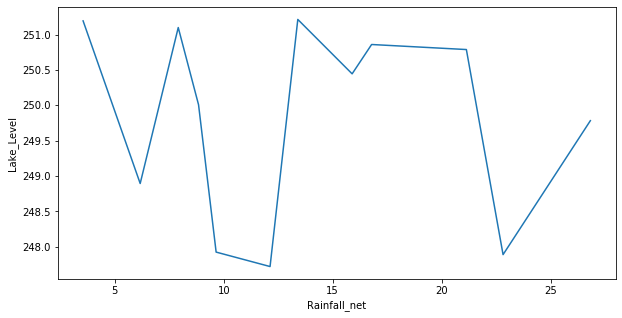

In [786]:
plt.figure(figsize=(10,5))
comp=lb1[lb1["Year"].isin([2018])]
Lake_Level_monthly_2018= comp.groupby(["Month"])[["Lake_Level","Rainfall_net"]].mean().reset_index()
#comp1=comp[["Lake_Level","Rainfall_net","Month"]]
sns.lineplot(data=Lake_Level_monthly_2018, x="Rainfall_net", y="Lake_Level")

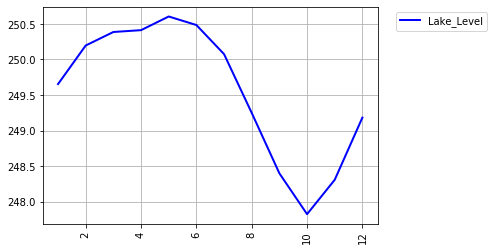

In [787]:
Lake_Level_monthly= lb.groupby(["Month"])[['Lake_Level']].mean().reset_index()
plt.plot( 'Month','Lake_Level', data=Lake_Level_monthly, marker='', color='blue', linewidth=2, )
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.xticks(rotation = 90)
plt.grid()

##### Choosing the predictor and target variables for Supervised Machine learning model.

In [788]:
X= lb1[["Year","Month","Temperature_Le_Croci","Rainfall_mean", "day_of_the_year","Rainfall_median","Rainfall_net"]]
X.head()

,Year,Month,Temperature_Le_Croci,Rainfall_mean,day_of_the_year,Rainfall_median,Rainfall_net
578,2004,2,6.50,0.00,32,0.0,0.0
579,2004,3,4.45,0.00,61,0.0,0.0
580,2004,4,2.00,0.00,92,0.0,0.0
581,2004,5,0.90,0.04,122,0.0,0.2
582,2004,6,2.25,0.00,153,0.0,0.0


In [789]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6025 entries, 578 to 6602
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  6025 non-null   int64  
 1   Month                 6025 non-null   int64  
 2   Temperature_Le_Croci  6025 non-null   float64
 3   Rainfall_mean         6025 non-null   float64
 4   day_of_the_year       6025 non-null   int64  
 5   Rainfall_median       6025 non-null   float64
 6   Rainfall_net          6025 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 376.6 KB


In [790]:
y=lb1[["Lake_Level"]]
y.head()

,Lake_Level
578,251.21
579,251.28
580,251.35
581,251.37
582,251.42


In [791]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6025 entries, 578 to 6602
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Lake_Level  6025 non-null   float64
dtypes: float64(1)
memory usage: 94.1 KB


##### Linear regression for Modeling

In [792]:
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [793]:
train = lb1[~lb1['Year'].isin([2017,2018,2019,2020])]
test = lb1[lb1['Year'].isin([2018])]

X_train = train[["Year","Month","Temperature_Le_Croci","Rainfall_mean","Rainfall_net","day_of_the_year"]]
y_train = train[["Lake_Level"]]

X_test = test[["Year","Month","Temperature_Le_Croci","Rainfall_mean", "Rainfall_net","day_of_the_year"]]
y_test = test[["Lake_Level"]]

In [794]:
#X_train, X_test,y_train, y_test= train_test_split(X, y, train_size=0.8 , random_state=100)
lr= LinearRegression(normalize=True)

In [795]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [796]:
y_pred= lr.predict(X_test)

##### Model accuracy evaluation using r_squared method

In [797]:
r_squared = r2_score(y_test, y_pred)

In [798]:
r_squared

0.11784515929958728

#### Random forest for Modeling for prediction

In [799]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=100, random_state=0)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

/Users/farazrahman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [800]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.6959825208041049